In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Setting up data 

In [2]:
carData = pd.read_csv('fordFocusBlack.csv')
carData.head()

,year,model,price,mileage,color,transmission
0,2010,SES,16995,40539,Black,AUTO
1,2010,SEL,15889,24920,Black,AUTO
2,2010,SE,15499,7784,Black,AUTO
3,2010,SE,15499,35636,Black,AUTO
4,2009,SE,14995,34419,Black,MANUAL


The size of the car data is:  (35, 6)


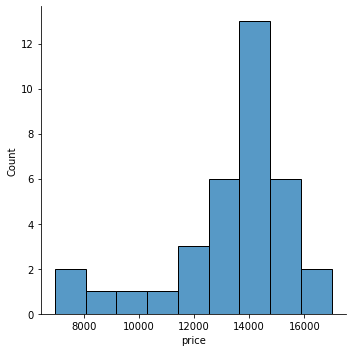

In [3]:
print('The size of the car data is: ', carData.shape)
sns.displot(data=carData, x='price')
plt.show()

# Feature Engineering

How is the sale price related to different attributes

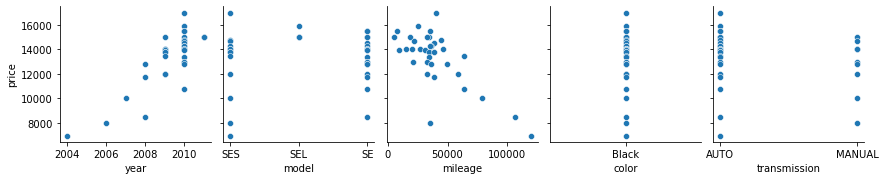

In [4]:
sns.pairplot(carData, x_vars=['year','model','mileage','color','transmission'], y_vars='price')
plt.show()

This plot suggest price is dependent on year or mileage

# Creating a linear regression model based on mileage

In [5]:
feature = ['mileage']
XTrain = carData[feature]
YTrain = carData.price

linearModel = LinearRegression()
linearModel.fit(XTrain.values,YTrain)

print('Y intercept: ', linearModel.intercept_)
print('Slope: ', linearModel.coef_[0])

Y intercept:  15893.920250633702
Slope:  -0.06579555287888011


According to this model for each mile driven the price of the car will drop aprox 6-7 cents, while a new Ford Focus will cost aprox $15.9K. What will a Ford Focus with 40K miles cost approximately?

In [7]:
XTest = [[40000]]
print('Predicted price with 40K miles: ', linearModel.predict(XTest)[0])

Predicted price with 40K miles:  13262.098135478498


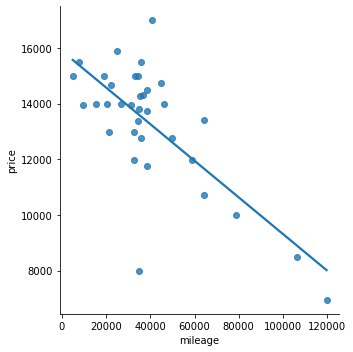

In [8]:
sns.lmplot(x='mileage', y='price', data=carData, ci=0)
plt.show()

# Model Evaluation Metrics

In [10]:
print('RMSE: ', np.sqrt(mean_squared_error(linearModel.predict(XTrain.values), YTrain)))
print('R-squared: ', linearModel.score(XTrain.values,YTrain))

RMSE:  1521.1660116442852
R-squared:  0.5173793966172642


# Linear Regression using year attribute

Y-Intercept:  -2613477.3798586586
Slope:  1307.3449646643116


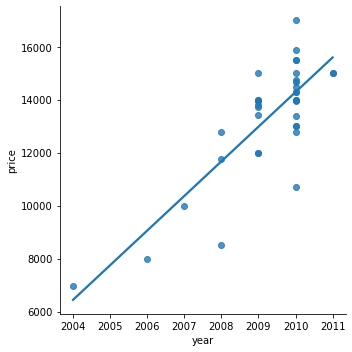

RMSE:  1278.9663123908597
R-squared:  0.658829994195121


In [11]:
features = ['year']
XTrain2 = carData[features]
YTrain2 = carData.price

linearModel2 = LinearRegression()
linearModel2.fit(XTrain2.values,YTrain2)

print('Y-Intercept: ', linearModel2.intercept_)
print('Slope: ', linearModel2.coef_[0])

sns.lmplot(x='year', y='price', data=carData, ci=0)
plt.show()

print('RMSE: ', np.sqrt(mean_squared_error(linearModel2.predict(XTrain2.values),YTrain2)))
print('R-squared: ', linearModel2.score(XTrain2.values,YTrain2))

# Testing With Silver Ford Focus Data

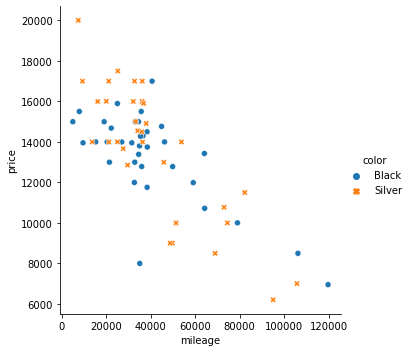

In [13]:
newCarData = pd.read_csv('fordFocusBlackSilver.csv')

features = ['mileage']
XData = newCarData[features].values
YData = newCarData.price

sns.relplot(x='mileage',y='price', data=newCarData, ci=0, style='color', hue='color')
plt.show()

In [14]:
XTrain, XTest, YTrain, YTest = train_test_split(XData, YData, test_size=0.2, random_state=2)

linearModel = LinearRegression()
linearModel.fit(XTrain,YTrain)

print('RMSE on training data: ',np.sqrt(mean_squared_error(linearModel.predict(XTrain),YTrain)) )
print('RMSE on testing data: ',np.sqrt(mean_squared_error(linearModel.predict(XTest),YTest)))

RMSE on training data:  1765.5046876435035
RMSE on testing data:  1851.198213354579


# Polynomial Model

In [ ]:
maxDeg = 10

RSquare = np.zeros(maxDeg + 1)
RMSE = np.zeros(maxDeg + 1)

for deg in range(0,maxDeg+1):
    poly = PolynomialFeatures(degree=deg)
    XTrans = poly.fit_transform(XTrain)
    polyModel = LinearRegression()
    polyModel.fit(XTrans,YTrain)
    
    XTestTrans = poly.fit_transform(XTest)
    print('\nPolynomial regression with degree ', deg, ':')
    RSquare[deg] = polyModel.score(XTestTrans,YTest)
    print('R-squared value: ', RSquare[deg])
    RMSE[deg] = np.sqrt(mean_squared_error(polyModel.predict(XTestTrans),YTest))
    print('RMSE: ', RMSE[deg])
plt.plot(range(0,maxDeg + 1), RMSE, 'x')
plt.title('RMSE v Polynomial degree')
plt.xlabel('Degree')
plt.ylabel('RMSE with Tes')